In [1]:
import numpy as np
import matplotlib.pyplot as plt

from siriusx import SiriusX

# Conneting to device and checking capabilities

In [2]:
sirius = SiriusX()

In [3]:
sirius.list_available_devices()

Name: MateView Analog Stereo Connection string: miniaudio://pulseaudio/alsa_input.usb-Dialog_Semiconductor__UK__Ltd_MateView_c856981715-01.analog-stereo
[tid: 7716][2025-08-29 12:06:57.177] [ModuleManager] [warning] Failed to check for network settings: open: Operation not permitted [system:1 at /__w/openDAQ/openDAQ/build/__external/src/Boost/libs/asio/include/boost/asio/detail/reactive_socket_service.hpp:133 in function 'open']
Name: Monitor of Raptor Lake-P/U/H cAVS HDMI / DisplayPort 3 Output Connection string: miniaudio://pulseaudio/alsa_output.pci-0000_00_1f.3-platform-skl_hda_dsp_generic.HiFi__HDMI3__sink.monitor
Name: Monitor of Raptor Lake-P/U/H cAVS HDMI / DisplayPort 2 Output Connection string: miniaudio://pulseaudio/alsa_output.pci-0000_00_1f.3-platform-skl_hda_dsp_generic.HiFi__HDMI2__sink.monitor
Name: Monitor of Raptor Lake-P/U/H cAVS HDMI / DisplayPort 1 Output Connection string: miniaudio://pulseaudio/alsa_output.pci-0000_00_1f.3-platform-skl_hda_dsp_generic.HiFi__HDMI1

In [4]:
sirius.connect("daq://Dewesoft_DB24050686")

True

In [5]:
sirius.get_sample_rate()

100

In [6]:
sirius.set_sample_rate(100)

100

In [7]:
sirius.list_available_channels()

Channel Global ID:  /openDAQDevice/Dev/Dewesoft_DB24050686/IO/1/AI1
Channel Name     :  acc_X
  Function Block Name:  Amplifier
     Measurement          : IEPE       [Voltage, IEPE] 
     Range                : 10000      [10000, 5000, 1000, 200] mV
     HPFilter             : AC 1Hz     [AC 0.1Hz, AC 1Hz] 
     Excitation           : 2.0        [2, 4, 6] mA
     ExcitationUnit       : mA         [mA] 
     SupportsLed1Control  : True       None 
Channel Global ID:  /openDAQDevice/Dev/Dewesoft_DB24050686/IO/1/AI2
Channel Name     :  acc_Y
  Function Block Name:  Amplifier
     Measurement          : IEPE       [Voltage, IEPE] 
     Range                : 10000      [10000, 5000, 1000, 200] mV
     HPFilter             : AC 1Hz     [AC 0.1Hz, AC 1Hz] 
     Excitation           : 2.0        [2, 4, 6] mA
     ExcitationUnit       : mA         [mA] 
     SupportsLed1Control  : True       None 
Channel Global ID:  /openDAQDevice/Dev/Dewesoft_DB24050686/IO/1/AI3
Channel Name     :  acc_Z
  

# Configuring channels

In [8]:
channel_settings = {
    0: {
        'Name': 'acc_X',
        'Measurement': 'IEPE', # [IEPE, Voltage]
        'Range': '10000', # [10000, 5000, 1000, 200] mV
        'HPFilter': 'AC 1Hz', # [AC 0.1Hz, AC 1Hz]
        'Excitation': 2.0, # [2, 4, 6] mA
        'Sensitivity': 100,
        'Sensitivity Unit': 'mV/g', # [mV/g, mV/(m/s^2)]
        'Unit': 'g', # [g, m/s^2]
    },
    1: {
        'Name': 'acc_Y',
        'Measurement': 'IEPE', # [IEPE, Voltage]
        'Range': '10000', # [10000, 5000, 1000, 200] mV
        'HPFilter': 'AC 1Hz', # [AC 0.1Hz, AC 1Hz]
        'Excitation': 2.0, # [2, 4, 6] mA
        'Sensitivity': 100,
        'Sensitivity Unit': 'mV/g', # [mV/g, mV/(m/s^2)]
        'Unit': 'g', # [g, m/s^2]
    },
    2: {
        'Name': 'acc_Z',
        'Measurement': 'IEPE', # [IEPE, Voltage]
        'Range': '10000', # [10000, 5000, 1000, 200] mV
        'HPFilter': 'AC 1Hz', # [AC 0.1Hz, AC 1Hz]
        'Excitation': 2.0, # [2, 4, 6] mA
        'Sensitivity': 100,
        'Sensitivity Unit': 'mV/g', # [mV/g, mV/(m/s^2)]
        'Unit': 'g', # [g, m/s^2]
    },
    3: {
        'Name': 'vol_1',
        'Measurement': 'Voltage', # [IEPE, Voltage]
        'Range': '10', # [10, 5, 1, 0.2] V
        'HPFilter': 'DC', # [DC, AC 0.1Hz, AC 1Hz] 
        'Sensitivity': 1,
        'Sensitivity Unit': 'V/V', # [arbitrary]
        'Unit': 'V', # [arbitrary]
    }
}

In [9]:
sirius.configure_channels(channel_settings=channel_settings)

In [10]:
# check if settings are applied
sirius.list_available_channels()

Channel Global ID:  /openDAQDevice/Dev/Dewesoft_DB24050686/IO/1/AI1
Channel Name     :  acc_X
  Function Block Name:  Amplifier
     Measurement          : IEPE       [Voltage, IEPE] 
     Range                : 10000      [10000, 5000, 1000, 200] mV
     HPFilter             : AC 1Hz     [AC 0.1Hz, AC 1Hz] 
     Excitation           : 2.0        [2, 4, 6] mA
     ExcitationUnit       : mA         [mA] 
     SupportsLed1Control  : True       None 
Channel Global ID:  /openDAQDevice/Dev/Dewesoft_DB24050686/IO/1/AI2
Channel Name     :  acc_Y
  Function Block Name:  Amplifier
     Measurement          : IEPE       [Voltage, IEPE] 
     Range                : 10000      [10000, 5000, 1000, 200] mV
     HPFilter             : AC 1Hz     [AC 0.1Hz, AC 1Hz] 
     Excitation           : 2.0        [2, 4, 6] mA
     ExcitationUnit       : mA         [mA] 
     SupportsLed1Control  : True       None 
Channel Global ID:  /openDAQDevice/Dev/Dewesoft_DB24050686/IO/1/AI3
Channel Name     :  acc_Z
  

# Data acqusition
Acuquire desired number of samples with flushing the harware buffer at the beggining. 

## Raw data

In [11]:
raw_data = sirius.acquire_raw(sample_count=200, timeout=5)
raw_data

array([[-1.07879721e+00, -2.87182257e-01,  7.49304446e-01,
         9.40319605e-05],
       [-1.12449829e+00, -1.74866330e-01,  5.49415086e-01,
         1.21461118e-04],
       [-1.11405233e+00, -1.93150318e-01,  2.76363608e-01,
         9.66442612e-05],
       [-1.01350995e+00, -4.16544172e-02,  1.10335684e+00,
         1.22767268e-04],
       [-1.12188680e+00, -1.42216352e-01,  3.11638201e-01,
         9.01135095e-05],
       [-1.03048464e+00, -3.90424189e-02,  4.60575371e-01,
         1.21461118e-04],
       [-1.06835125e+00, -8.60583882e-02,  5.12834027e-01,
         9.14196598e-05],
       [-1.14669596e+00, -1.94524316e-02,  3.92639118e-01,
         1.17542667e-04],
       [-1.03831911e+00, -2.15352304e-01,  8.53821758e-01,
         9.40319605e-05],
       [-1.13233276e+00, -5.99384052e-02,  3.05105869e-01,
         1.20154968e-04],
       [-1.03309613e+00, -2.34942291e-01,  7.17949252e-01,
         9.01135095e-05],
       [-1.10621786e+00,  3.27875343e-02,  4.26607245e-01,
      

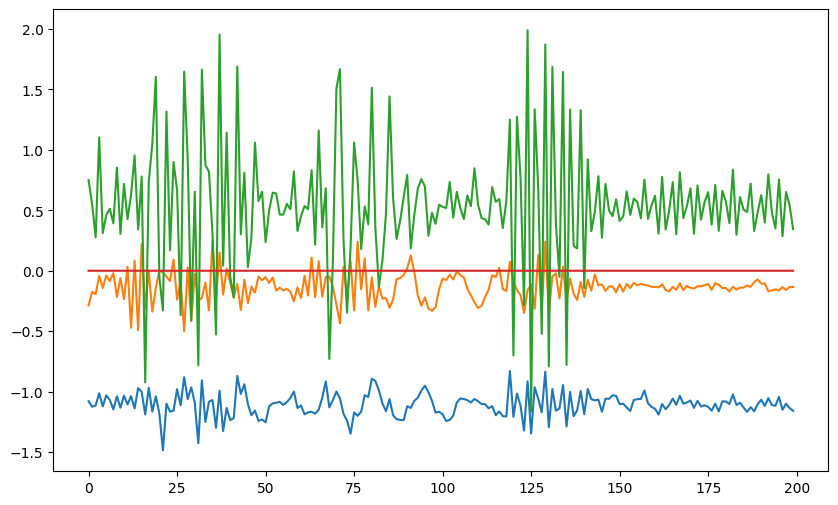

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(raw_data)

## Processed data (applied sensitivity)

In [13]:
processed_data = sirius.acquire_processed(1.)
processed_data

array([[-1.25115557e-02, -1.29224359e-04,  2.84202407e-03,
         9.27258102e-05],
       [-1.20676024e-02, -4.42664155e-04, -1.83512565e-03,
         1.22767268e-04],
       [-1.23287514e-02,  9.54754935e-04,  2.22798486e-03,
         9.66442612e-05],
       [-1.32819454e-02, -3.01548248e-03,  5.11527561e-03,
         1.21461118e-04],
       [-1.05137656e-02,  6.15195156e-04,  1.83236509e-02,
         9.14196598e-05],
       [-1.37128413e-02,  5.62955190e-04, -8.75939758e-03,
         1.16236517e-04],
       [-1.08532593e-02, -2.03598312e-03,  4.80172367e-03,
         9.53381109e-05],
       [-1.02395591e-02, -2.54532278e-03,  8.86483418e-03,
         1.20154968e-04],
       [-1.11927531e-02, -2.79346262e-03,  4.30526644e-03,
         9.92565620e-05],
       [-8.47680307e-03,  7.19675088e-04,  1.28495567e-02,
         1.20154968e-04],
       [-1.05659954e-02, -3.06772244e-03, -5.15355031e-03,
         9.53381109e-05],
       [-1.04223634e-02, -2.27106296e-03,  8.65579956e-03,
      

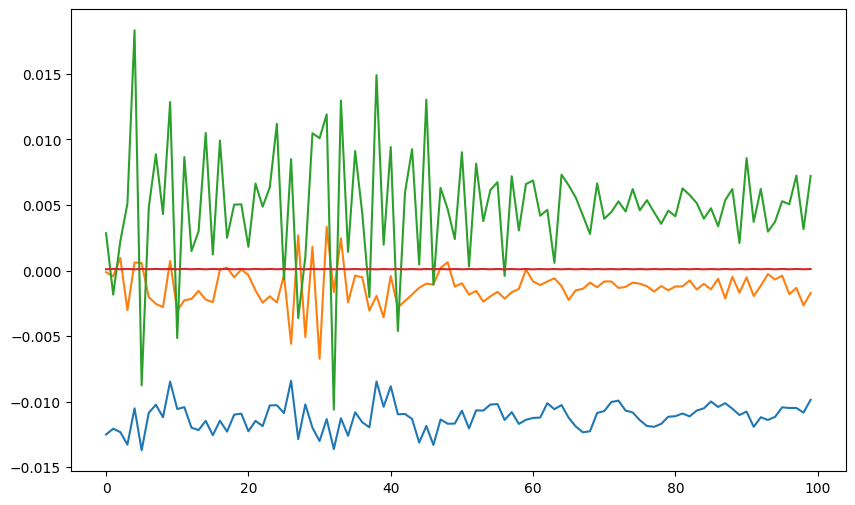

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(processed_data)

# Read data in custom loops
Enables reading data from device buffer without flushing the buffer.

In [15]:
sirius.create_reader()
sirius.start_reader()

In [16]:
sirius.read_raw(1000, 1)

array([[-1.09707764e+00, -2.31024294e-01,  3.49525727e-01,
         9.53381109e-05],
       [-1.15191894e+00, -2.71510267e-01,  4.47510707e-01,
         1.20154968e-04],
       [-1.15061319e+00, -8.34463899e-02,  5.66399150e-01,
         9.53381109e-05],
       [-1.17803384e+00, -5.60204078e-02,  2.85508873e-01,
         1.17542667e-04],
       [-1.17150512e+00,  2.75635377e-02,  6.21270738e-01,
         9.40319605e-05],
       [-1.19762002e+00, -1.31768358e-01,  7.98950169e-01,
         1.20154968e-04],
       [-1.27204750e+00,  2.74955390e-03,  4.42284841e-01,
         9.53381109e-05],
       [-1.06835125e+00, -6.64684010e-02,  6.43480667e-01,
         1.21461118e-04],
       [-1.24462685e+00, -4.81844129e-02,  6.47160513e-02,
         9.79504116e-05],
       [-1.15975341e+00, -2.32330293e-01,  6.08206074e-01,
         1.21461118e-04],
       [-1.08663168e+00, -6.77744001e-02,  8.59047624e-01,
         1.01868863e-04],
       [-1.20153726e+00, -3.77296198e-01, -1.23415111e-01,
      

In [17]:
sirius.read_processed(1000, 1)

array([[-1.03048464e-02, -2.34942291e-03,  2.94654138e-03,
         9.27258102e-05],
       [-1.08924317e-02, -2.59756275e-03,  5.15446960e-03,
         1.11011915e-04],
       [-1.11927531e-02, -3.10690242e-03,  6.47400066e-03,
         9.01135095e-05],
       [-1.18064533e-02, -2.81958261e-03,  4.31833110e-03,
         1.13624216e-04],
       [-1.09968913e-02, -1.63112338e-03,  5.20672826e-03,
         9.01135095e-05],
       [-1.07096274e-02, -1.10872372e-03,  4.16155513e-03,
         1.12318065e-04],
       [-1.10099488e-02, -6.25504035e-04,  3.71735656e-03,
         9.01135095e-05],
       [-1.04615358e-02, -4.81844129e-04,  7.88498438e-03,
         1.12318065e-04],
       [-1.15714192e-02, -3.78044184e-05,  4.86704699e-03,
         8.88073591e-05],
       [-1.14147298e-02, -2.99004248e-04,  6.09512541e-03,
         1.13624216e-04],
       [-1.15191894e-02,  2.75635377e-04,  4.46204241e-03,
         8.75012088e-05],
       [-1.13363851e-02, -1.34380357e-03,  4.61881837e-03,
      

In [18]:
sirius.available_samples()

120

In [19]:
sirius.stop_reader()